# Markku.ai


In [58]:
import glob
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Data loading

In [165]:
def get_meta(path):
    try:
        with open('%s/meta.json' % path, 'r') as f:
            meta = json.load(f)
            meta_dict = {}
            for i, key in enumerate(meta['inputs']):
                meta_dict[key] = meta['types'][i]
            return meta_dict
    except:
        return None
    
def load_image(path):
    img = Image.open(path)
    return np.array(img)

def linear_bin(a):
    """
    Convert a value to a categorical array.

    Parameters
    ----------
    a : int or float
        A value between -1 and 1

    Returns
    -------
    list of int
        A list of length 5 with one item set to 1, which represents the linear value, and all other items set to 0.
    """
    a = a + 1
    b = round(a / (2 / 4))
    arr = np.zeros(5, dtype=np.int8)
    arr[int(b)] = 1
    return arr

In [150]:
# Input types
IMAGE_TYPE = 'cam/image_array'

# Output types
THROTTLE_TYPE = 'user/throttle'
ANGLE_TYPE = 'user/angle'

# Data folder
tub_names = "./data/nelonen/"
tubs = glob.glob(str('%s/**/*' % tub_names), recursive=True)

tubs = (tub for tub in tubs if os.path.isdir(tub))

X = []
Y = []
for tub in tubs:
    meta = get_meta(tub)
    if (meta != None):
        records = glob.glob('%s/record_*.json' % tub)
        for record_path in records:
            with open(record_path, 'r') as record_file:
                record = json.load(record_file)
                img_path = record[IMAGE_TYPE]
                angle = record[ANGLE_TYPE]
                throttle = record[THROTTLE_TYPE]
                x = load_image("%s/%s" % (tub, img_path)) / 255
                X.append(x)
                Y.append([angle, throttle])
    

In [151]:
train_data_amount = np.asarray(X).shape[0]
print(train_data_amount)

4075


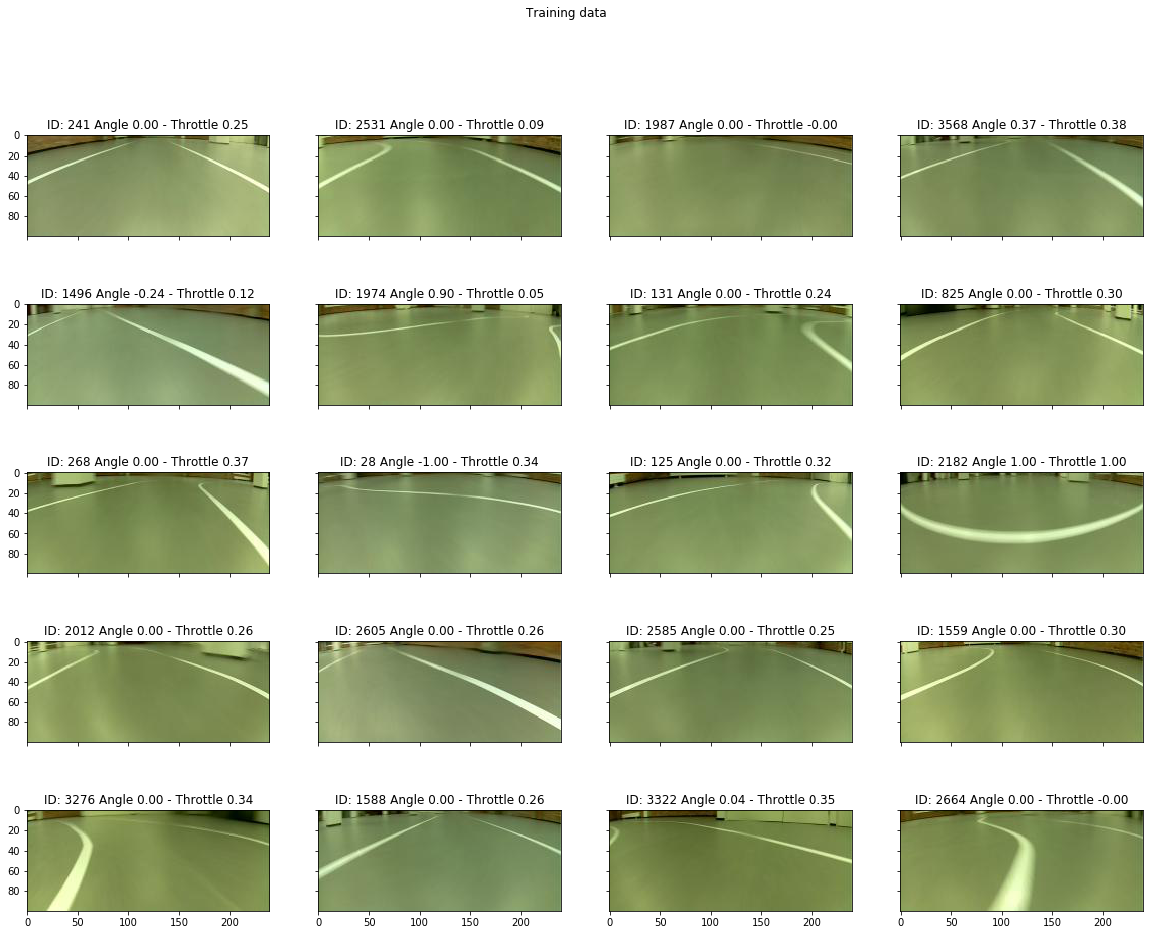

In [171]:

nr = 5
nc = 4
fig, axs = plt.subplots(nr, nc, figsize = (20,15))
fig.suptitle("Training data")

for i in range(nr):
    for j in range(nc):
        idx = np.random.randint(train_data_amount - 1)
        axs[i, j].imshow(X[idx])
        axs[i, j].label_outer()
        axs[i, j].title.set_text('ID: {0:1d} Angle {1:.2f} - Throttle {2:.2f}'.format(idx, Y[idx][0], Y[idx][1]))
        

## Changing continuous linear space to categorical problem

In [172]:

id = 1528
print(linear_bin(Y[id][0]), Y[id][0])
print(linear_bin(Y[id][1]), Y[id][1])

[0 1 0 0 0] -0.3728141117587817
[0 0 0 0 1] 1.0
